In [2]:
import numpy as np
import pandas as pd

In [42]:
numericals = pd.read_pickle('numerical_new.pkl')
categoricals = pd.read_pickle('categorical_new.pkl')
target = pd.read_csv('files_for_lesson_and_activities/target.csv')

# saving a dataframe to pickle
# pd.to_pickle(dataframe, 'my_pickle.pkl')

# First part: More systematic approaches for feature selection

## Variance Threshold

In [ ]:
# first standardize the features!

In [46]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.feature_selection import VarianceThreshold

In [10]:
sel = VarianceThreshold(threshold=(.9))
sel = sel.fit(numericals)
temp = sel.transform(numericals)

In [14]:
temp.shape

(95412, 317)

In [15]:
numericals.shape

(95412, 335)

In [18]:
# variances for every feature
sel.variances_

array([1.17959931e+05, 9.09809748e+05, 4.54640529e+06, 2.08815897e+02,
       1.17959931e+05, 7.52110028e+00, 8.66174573e+01, 2.56592472e+01,
       1.31572233e+02, 2.27939712e+02, 3.13607695e+02, 1.92868188e+01,
       2.62819398e+01, 1.72652418e+01, 7.85530474e+00, 3.29841989e+07,
       2.12604334e+06, 4.50749041e+06, 2.24965472e+03, 9.74807925e+02,
       1.60301299e+03, 3.09753487e+01, 3.32736401e+01, 4.41578315e+02,
       2.78578917e+02, 1.20360456e+01, 4.99809732e+01, 1.90053487e+02,
       4.61409700e-01, 4.98251426e+00, 6.41978865e+00, 5.33237152e+00,
       1.00706114e+00, 1.11115939e+00, 1.36811691e+00, 1.28447653e+02,
       1.67136727e+00, 1.02953264e+01, 1.13250253e+01, 6.94817913e+01,
       6.80563524e+01, 6.57568628e+01, 5.27246856e+01, 4.84411762e+01,
       4.73710296e+01, 5.64791144e+01, 6.77692565e+01, 4.07109305e+01,
       3.39562669e+01, 3.68229986e+01, 6.06488198e+01, 3.85766793e+01,
       1.86306173e+01, 1.71850636e+01, 3.60457837e+01, 4.52079107e+01,
      

In [24]:
# all features that were dropped:
numericals.columns[sel.variances_ <= .9]

Index(['ETH6', 'TPE6', 'TPE7', 'ANC5', 'ANC6', 'ANC11', 'ANC15', 'HC15',
       'MHUC2', 'ADATE_2', 'ADATE_3', 'ADATE_6', 'ADATE_9', 'ADATE_11',
       'ADATE_12', 'ADATE_14', 'ADATE_16', 'HPHONE_D'],
      dtype='object')

In [25]:
# all feature that were kept
numericals.columns[sel.variances_ > .9]

Index(['ODATEDW', 'TCODE', 'DOB', 'AGE', 'INCOME', 'WEALTH1', 'HIT',
       'MALEMILI', 'MALEVET', 'VIETVETS',
       ...
       'MAXRDATE', 'LASTGIFT', 'LASTDATE', 'FISTDATE', 'NEXTDATE', 'TIMELAG',
       'AVGGIFT', 'CONTROLN', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=317)

In [27]:
new_cols = list(numericals.columns[sel.variances_ > .9])

In [28]:
numericals[new_cols]

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC7,ANC8,ANC9,ANC10,ANC12,ANC13,ANC14,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,AC1,AC2,ADATE_4,ADATE_7,ADATE_8,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,8901,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,5,1,0,0,0,0,2,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,33,65,40,99,99,6,10,7,9604.0,9602.0,9601.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,4,39.0
1,9401,1,5202,46.000000,9401,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,2,3,1,1,3,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,99,0,99,99,99,20,6,5,9604.0,9602.0,9601.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,2,1.0
2,9001,1,0,61.611649,9001,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,

In [33]:
removed_columns = pd.DataFrame(data=(numericals.columns,
                                    sel.variances_,
                                     sel.get_support()),
                              index=('column_name', 'variance', 'statement')).T

In [34]:
removed_columns

,column_name,variance,statement
0,ODATEDW,117960,True
1,TCODE,909810,True
2,DOB,4.54641e+06,True
3,AGE,208.816,True
4,INCOME,117960,True
...,...,...,...
330,AVGGIFT,115.992,True
331,CONTROLN,3.05635e+09,True
332,HPHONE_D,0.25,False
333,RFA_2F,1.15078,True


In [29]:
# get the boolean table for all features whether they pass the threshold
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Question: Why not using PEarson as filter?

Pearson correlation: $$P_{x,y} = \frac{\text{cov}(X, Y)}{\sigma_Y * \sigma_Y}$$

Answer: You can do both

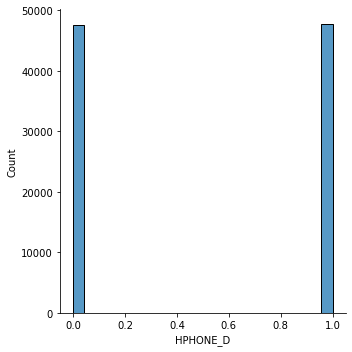

In [38]:
sns.displot(numericals['HPHONE_D'])

# Activity 1

In [41]:
target

Index(['version https://git-lfs.github.com/spec/v1'], dtype='object')

In [43]:
X = numericals
y = target['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=10).fit_transform(X, y)
# Here we chose 10 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected.head()

# To check the scores
model = SelectKBest(chi2, k=10).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numericals.columns
print(df.sort_values(by = ['score'], ascending = False).head(10))

cols = df.sort_values(by = ['score'], ascending = False).head(10)['Column']
cols



KeyError: 'TARGET_B'

# Recursive Feature Elimination (RFE)
(wrapper method, works in a backward elimination way, Documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html))

In [ ]:
from sklearn.feature_selection import RFE
from sklearn import linear_model

# change this to a classifier, since we're predicting a categorical variable. Or use logistic regression.
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False)
rfe.fit(X, y)

# After we run the algorithm, it labels the top features as 1 and the rest are
# marked in an increasing order of importance.
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = X.columns
df[df['Rank']==1]

# Intro to Inferential statistics

* **Descriptive statistics**:
    * mean, median, mode, frequency (histograms), standard deviation, variance
    * no uncertainty re: how to calculate those values
    
* **Inferential statistics**:
    * inferences: helps us to draw inferences from a sample to the whole population
    * given new data, how can update what I know about my population
    * think A/B testing
    
Why only a sample? -> financial, HR, ... constraints....

* **Hypothesis testing**
    * tool used to draw inferences on the population from the sample data
    * **Null Hypothesis**: $H_0$,
        * "The suspect is not guilty"
        * "The drug I'm testing has no effect"
        * "There is no god particle (Higgs Boson)"
        * The sample mean $\mu_0$ is **no** different than the population mean $\mu$
    * **Alternative Hypothesis**: $H_1$, $H_\alpha$...
        * "The suspect is guilty"
        * "The drug has an effect"
        * "There is a Higgs Boson"
        the effect is real. Or: The sample mean is different from the population mean
    * **Level of significance**:
        * we use that to indicate whether we are confident enough to reject the null hypothesis aka verifying the effect
        * alpha = 1 - confindence intervall (CI)
        * How confident do I have to be to accept new evidence (meaning the H1)
        * usual the alpha is said to be 5%, when stricter to accept new evidence: alpha is 3%, 1%
        * alpha for Higgs Boson 0.00003%
    * **Test statistic**. Calculated result which we compare to our level of significance in order to decide whether to reject $H_0$ and accept $H_\alpha$... which is the...
    * **p-value** is a measure used to help us in the decision whether to reject $H_0$
        * P( measuring that there is an effect| Null hypothesis is true = there is actually no effect)
        * if p-value is small, meaning, below the level of significance, then I will reject the null hypothesis and accept H_a
    
 * Side note: P(A|B) - means: propability that A occurs when B has occured.

**<end of day 2nd of march>**

# Recap central limit theorem (do understand why we can infer statements about the population from a sample in the first place)

<AxesSubplot:ylabel='Density'>

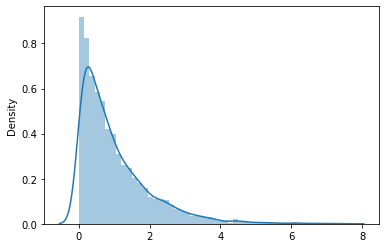

In [85]:
import seaborn as sns
import numpy as np

# this is what I'm sampling from now:
sns.distplot(np.random.exponential(size=5000))

let's write a function,
* that samples from that `rep` times,
* with a sample size of 
`sample_size`.
* And at each sampling, it calculates for every sample the mean
* and plots those means in a histogram

In [89]:
def plot_hist(sample_size, rep, distr, color=None, ax=None):
    sns.distplot([distr(size=sample_size).mean() for r in range(rep)],
        color=color,
        ax=ax,
        label=f"sample_size: {sample_size}, reps: {rep}",
        )

Text(0.5, 1.0, 'Sampling distributions of the means for various\n sampling sizes, sampled with 1000 repetitions')

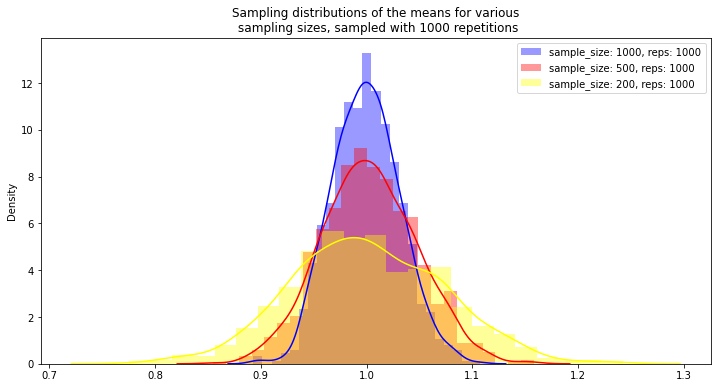

In [95]:
fig, ax = plt.subplots(figsize=(12,6))
plot_hist(1000, 1000, np.random.exponential, "blue")
plot_hist(500, 1000, np.random.exponential, "red")
plot_hist(200, 1000, np.random.exponential, "yellow")
plt.legend()
plt.title("Sampling distributions of the means for various\n sampling sizes, sampled with 1000 repetitions")

* with increasing sample size, the distribution gets thinner and thinner
* you can find:

$$\sigma_{\text{sampling_distr}} = \frac{\sigma_\text{population}}{\sqrt{n}} = \text{SE}_\text{mean}$$
(show google sqrt(x))

* we're approaching the true mean (population mean, here: 1) with growing precision
* meaning: in an inference scenario: with large enough `n` you can approximate the (often unknown) population mean with the sample mean!
* You may wonder: **And increasing reps**? Try it yourself, you don't find any improvement

Most important takeaway:

* when your sample size is **large enough**, you can assume, that your **sample means are normally distributed, regardless of the actual distribution of your values!**
* this is the foundation for hypothesis testing!
* And actually: We only need one sample for inference, knowing that, with a large enough sample size, all the means are randomly distributed around the true population mean
* Otherwise: We would have to sample 1000 times for A/B testing!

[link](https://statisticsbyjim.com/basics/central-limit-theorem/)

## 10 min break

# Let's do some Hypothesis testing


Case:

*Boys of a certain age are known to have a **mean weight** of $\mu_\bar{x}$ = 85 pounds. A complaint is made that the boys living in a municipal children's home are underfed. As one bit of evidence, **n = 25 boys** out of all the boys (of the same age) in that home are weighed and found to have a **mean weight of 80.94 pounds**. It is known that the **population standard deviation σ is 11.6 pounds**. Based on the available data, what should be concluded concerning the complaint?*

Let's try to disprove or prove that assumption using a statistical test.
Population

### test setup

1. Step: **Nullhypothesis**: $H_0: \mu = 85kg$ (boys are not underfed! our sample yielded that mean due to sampling error!)

2. Step: **Alternative Hypothesis**: $H_1: \mu < 85kg$ (boys are indeed underfed!)

3. Step: Set the **Level of significance**: $\alpha$ = 5%

we use a so called **z-test** here, since the population variance is known (since population standard deviation is provided). If not we would have chosen a t-test (similar normal distribution but flatter)



4. Step: Calculate the **Z-score**
how many units(!) in sample standard deviations away from true population mean is our sample mean?:
$$Z = \frac{\bar{x} - \mu_\bar{x}}{\frac{\sigma_\text{pop}}{\sqrt{n}}}$$

And this "Z-statistic" is normally distributed, which we know by know from Central Limit Theorem, when `n` is large.

where:
- $\bar{x}$ : sample mean
- $\mu_\bar{x}$ : population mean
- $\sigma_{\text{sampling_distr}} = \frac{\sigma_\text{pop}}{\sqrt{n}} = \text{SE}$ : Standard error of the means of our sampling distribution (we know that from CLT!)

* **Plug in all the values**
$$Z = \frac{80.94 \text{kg} - 85 \text{kg}}{\frac{11.6 \text{kg}}{\sqrt{25}}} = -1.75$$

5. Step:

* If the z-statistic falls into the **rejection** region (determined by our confidence level), **we reject $H_0$**
* else, if it doesn't: We default to $H_0$

*we're using the **Z-score** approach here, another is the **p-value approach** (later)*

In [97]:
# do it with python
from statistics import math

sample_mean = 80.94
pop_mean = 85
pop_std = 11.6
n = 25
statistic = (sample_mean - pop_mean)/(pop_std/math.sqrt(n))
print("Statistic is: ", statistic)

Statistic is:  -1.750000000000001


Which gives us the information:

* how many multiples of the standard deviation (of our sample means) away from the true population mean of 85 is our mean of 80.94 the allegedly underfed boys.
* Which is already a valuable information... because we can now
* .. estimate the likelihood to obtain such a value **or worse**
* given that the null hypothesis is true (which was that the true mean is 85 kg)
* **draw that area into into the curve**

**draw the values and the area into the bell curve**

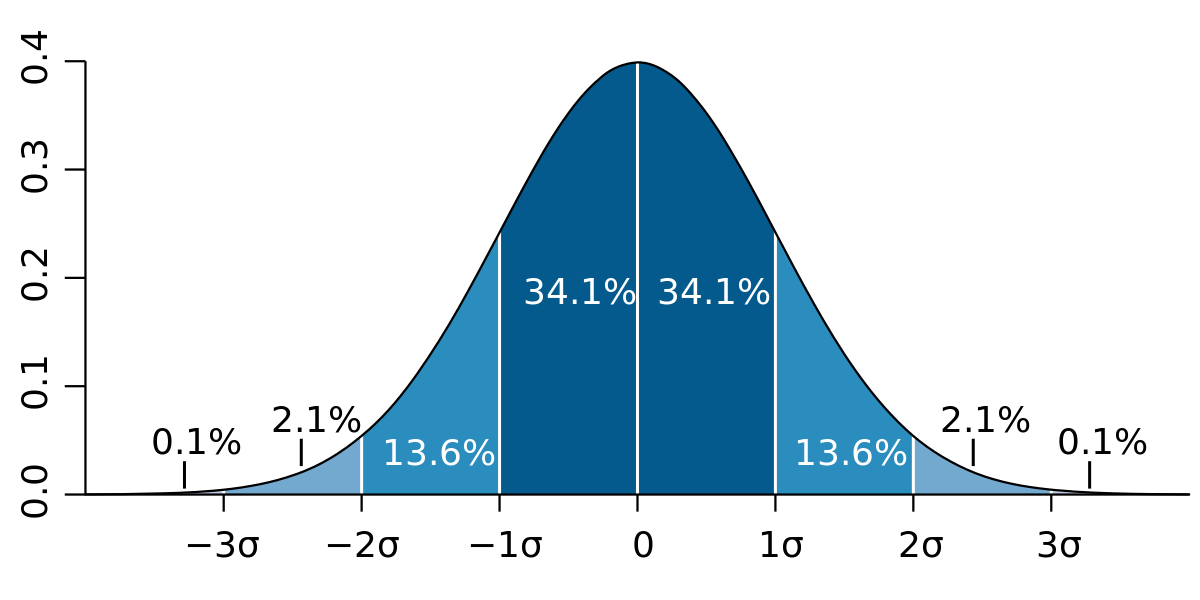

In [100]:
from IPython.display import Image
Image(filename='Standard_deviation_diagram.png', width=400) 

# Lab | Inferential statistics

# 7.04 Inferential Statistics extended - T Tests - P values

* Now check, **whether our sample mean falls in the rejection region** (which is determined by our confidence level alpha (alpha is actually the area under the tail), use [this table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf)
* search for $\alpha=0.05$
* Z value for rejection should be ca. 1.64
* our Z-score falls outside that value
* so we determine: 
    * we have enough evidence to **reject** $H_0$ because
    * given our confidence level
    * we have found that it is too unlikely that we measure this boys' weights mean **just by chance**, that it might be just a pure sample error

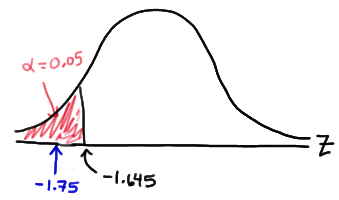

In [96]:
from IPython.display import Image
Image(filename='Less7.3_Draw01.gif') 

### p-value approach

* we calculated the Z-statistic to be -1.75
* we look into the [same Z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf) to determine the so called **p-value**
* p value: area under the curve left of Z=-1.75, which is a **probability**
* namely: the probability to measure this mean of the alledgedly underfed boys **given a underlaying normal distribution** centered around the true population mean of 85 kg
* or in other words $P(\mu_\text{sample} <= 80.94 | H_{0} \text{ is true})$
* **DRAW the bell curve again using the means for the x-scale**

* determined p-value: **0.04**
* which is less than 5%
* so also here, **we reject** $H_0$

# Activity 1

The datasets are provided in the files_for_activities folder.

 For the example covered in the lab for the last lesson, using the test statistics and then using the p-value, do you reject the null hypothesis or you fail to reject the null hypothesis?

Here is the question again for reference:

*It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?*

Set up the hypothesis test.

### solution

either [here](https://online.stat.psu.edu/stat415/book/export/html/827), or:

*Test statistics was calculated to be 4.761904761904759, the critical value can be found from the z table in this case 1.98. Since the statistics is larger than the critical value, it is in the rejection region and hence null hypothesis is rejected.
Using the p-value: P-value in this case is found to be 3.281350908546088e-06. This is very small as compared to 0.05 and brings us in the rejection region. Hence we reject the null hypothesis.*




## Two sample t-test (used for A/B testing)

* one of the central tools you do as a **data analyst** or **data scientist**
* A/B-testing = an **experiment** (that has to be properly set up)
* needs a **highly controlled environment**
* **general motivation:** *You want to test whether a thing has an effect*
* two groups:
    * group B (**test group**): 
        * gets the treatment
        * users who get presented the new feature in an app
        * get presented the new website
    * group A (**control group**):
        * doesn't get the treatment (gets a TicTac or placebo, but aren't told so)
        * users who don't get presented the new feature in an app
        * get presented the old website
        * **why group B in the first place?** Because here, we want to make statements about **causal relationships**. We want to isolate the effect. **Correlation does not imply causation**
* test if:
     * whether drug is effective (apart from placebo effect)
     * more signup
     * more interaction -> more ads shown -> more revenue
     * measure the different between the two groups
* and we do that by using methods of statistical inference like we have used them above

In the following, we're first generating us random data from two samples, which should represent the two groups (control and test) in an A/B testing scenario

**CAUTION** if you run the Notebook again, it generates you different data and the statistical conclusions may not apply anymore!

In [110]:
import uuid
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

date_range = pd.date_range(start="2018-07-01", end="2018-09-01")

control = {1: 10,
           2: 3,
           3: 8,
           4: 20,
           5: 59,
          }

test = {1: 10,
        2: 2,
        3: 10,
        4: 22,
        5: 63,
       }

def generate_review_distribution(freq_dict):
    l = []
    for key, value in freq_dict.items():
        l += [key] * value
    return l

def get_random_review(date, group):
    if (group == 102) & (date >= np.datetime64("2018-07-15")):
        random_reviews = generate_review_distribution(test)
    else:
        random_reviews = generate_review_distribution(control)
    return random.choice(random_reviews)
    
def generate_random_observation(date, group):
    return str(uuid.uuid4()), get_random_review(date, group)

# create list of dicts to later on convert to a dataframe
rows = []
for date in date_range:
    # two groups
    for group in [101,102]:
        # pick a random number of orders btw 350 and 450
        orders = random.choice(range(350,450))
        for obs in range(orders):
            order_id, review_score = generate_random_observation(date, group)
            rows.append({"date_id": date,
                         "experiment_id": group,
                         "order_id": order_id,
                         "review_score": review_score})
            
df = pd.DataFrame(rows)

### Busines case here
* fictional data about the review scores for certain orders at an ecommerce plattform, inspired by "OLIST" (search on kaggle)
* customers would order things, get it shipped after a few days and then later eventually provide a review score
* **test**: Find out, whether if we overestimate the delivery time and communicate that to the users, they would give a better review score (similar to Jeff Bezos does it nowadays)?
* so we expose a group of customers (**group B**, the test group, "variant", marked **102** in the following) **randomly** to that "overestimation" and check their reviewscores $rs_B$
* and select another group (**group A**, this is the control group, marked **101** in the following) **randomly** which doesn't get presented the overestimation, and check their reviewscores $rs_A$
* apart from exposing/non exposing, the environments are the same

* Hypotheses: here we use  RS as our decision criterion (whether test is successfull)
* **Nullhypothesis**: $H_0$: $RS_B = RS_A$
* **Alternative Hypothesis**: $H_1$: $RS_B + c = RS_A$ or $RS_B \neq RS_A$

In [111]:
df

,date_id,experiment_id,order_id,review_score
0,2018-07-01,101,d8b38d82-af24-4669-a3b1-875c2c3e47f4,5
1,2018-07-01,101,6ddca037-e10b-40d5-b30a-83b76de636cf,5
2,2018-07-01,101,ac09c0d0-b765-42c2-ab41-e115164c4c62,5
3,2018-07-01,101,5fa66828-8a4e-47da-a74d-c58aec04440c,4
4,2018-07-01,101,bf71c371-bfe3-472d-9cda-ad815354244d,4
...,...,...,...,...
50162,2018-09-01,102,27662bec-6664-4158-9fa4-eb2b06532c3f,4
50163,2018-09-01,102,127da33c-c754-45b3-b4ae-a16bfd61b9e4,4
50164,2018-09-01,102,2b3a0b93-6ec9-4bbd-a0c8-80bc60c529aa,5
50165,2018-09-01,102,e7d6bfea-9b63-4337-891f-f4397d9c15d4,5


## Plot the data

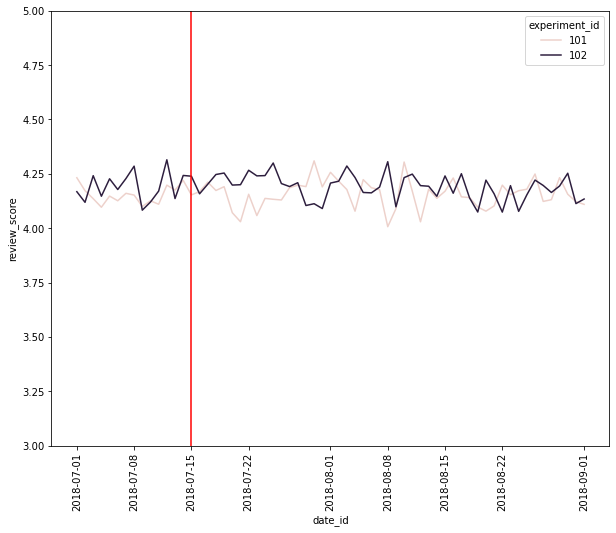

In [118]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=df.groupby(["date_id", "experiment_id"]).mean().reset_index(),
             x="date_id",
             y="review_score",
             hue="experiment_id",
             ax=ax);
ax.axvline("2018-07-15", color="r")
ax.set_ylim(3,5)
plt.xticks(rotation = 90);

Plotted: 
* RS for every group, averaged per day
* just by looking, you can't say, which group performed better
* typical phenomenon

In [122]:
# exposure date (start of A/B test): "2018-07-15"
df[df["date_id"] > "2018-07-15"].groupby("experiment_id").mean()

,date_id,experiment_id,order_id,review_score
11978,2018-07-16,101,06befd74-0686-4259-bd55-2b476ac8b5dd,5
11979,2018-07-16,101,7435dd20-ee92-41fe-8412-a9305771295e,5
11980,2018-07-16,101,b1eef3eb-1761-41a9-a64e-dd2692929bde,5
11981,2018-07-16,101,1e2513e1-6c04-4134-b8f1-8543767dfcd3,5
11982,2018-07-16,101,1e0d0231-78de-4ac7-99e5-54c5ab7dea3b,5
...,...,...,...,...
50162,2018-09-01,102,27662bec-6664-4158-9fa4-eb2b06532c3f,4
50163,2018-09-01,102,127da33c-c754-45b3-b4ae-a16bfd61b9e4,4
50164,2018-09-01,102,2b3a0b93-6ec9-4bbd-a0c8-80bc60c529aa,5
50165,2018-09-01,102,e7d6bfea-9b63-4337-891f-f4397d9c15d4,5


* But this diffence may be **due to chance**! because we sample!
* **How can we quantify how confident we are**, that these numbers are **not the same**?

### Two sample t-test with unequal variance and unequal sample size (Welch t-test)

Before, for one sample, the standard error was:
$$\sigma_{\text{sampling_distr}} = \frac{\sigma_\text{pop}}{\sqrt{n}} = \text{SE}$$

Now we have to have a **combined error** (substitute the population std dev with the sample std dev. legitimate for large n) - the **weighted** average
$$\text{SE}_c = \sqrt{\frac{\sigma_\text{s,1}}{n_1} + \frac{\sigma_\text{s,2}}{n_2}} = $$


So let's get all these variables

In [120]:
df.head()

,date_id,experiment_id,order_id,review_score
0,2018-07-01,101,d8b38d82-af24-4669-a3b1-875c2c3e47f4,5
1,2018-07-01,101,6ddca037-e10b-40d5-b30a-83b76de636cf,5
2,2018-07-01,101,ac09c0d0-b765-42c2-ab41-e115164c4c62,5
3,2018-07-01,101,5fa66828-8a4e-47da-a74d-c58aec04440c,4
4,2018-07-01,101,bf71c371-bfe3-472d-9cda-ad815354244d,4


In [123]:
# these are the data I'm interested in
df[df["date_id"] > "2018-07-15"]

,date_id,experiment_id,order_id,review_score
11978,2018-07-16,101,06befd74-0686-4259-bd55-2b476ac8b5dd,5
11979,2018-07-16,101,7435dd20-ee92-41fe-8412-a9305771295e,5
11980,2018-07-16,101,b1eef3eb-1761-41a9-a64e-dd2692929bde,5
11981,2018-07-16,101,1e2513e1-6c04-4134-b8f1-8543767dfcd3,5
11982,2018-07-16,101,1e0d0231-78de-4ac7-99e5-54c5ab7dea3b,5
...,...,...,...,...
50162,2018-09-01,102,27662bec-6664-4158-9fa4-eb2b06532c3f,4
50163,2018-09-01,102,127da33c-c754-45b3-b4ae-a16bfd61b9e4,4
50164,2018-09-01,102,2b3a0b93-6ec9-4bbd-a0c8-80bc60c529aa,5
50165,2018-09-01,102,e7d6bfea-9b63-4337-891f-f4397d9c15d4,5


In [125]:
# store it in an extra variable
df_exp = df[df["date_id"] > "2018-07-15"]

In [132]:
# get all the stats metrics for each experiment ID
stats = df_exp.groupby("experiment_id").agg({"review_score": ["mean", "var", "std", "count"]})
stats

review_score                           
                      mean       var       std  count
experiment_id                                        
101               4.156901  1.679347  1.295896  19063
102               4.190840  1.539526  1.240776  19126

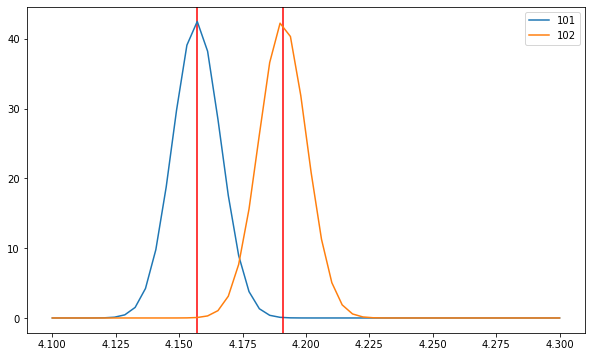

In [150]:
# We're applying the central limit to both of them (assuming their means are normally distributed)
# And plot them independently
fig, ax = plt.subplots(figsize=(10,6))

# standard error for 101
se_1 = stats.loc[101]['review_score']['std'] / np.sqrt( stats.loc[101]['review_score']['count'])

# now I have my standard error, so I can plot my normal distribution
# using scipy
x = np.linspace(4.1, 4.3)

pdf_1 = scipy.stats.norm.pdf(x, 
                    stats.loc[101]['review_score']['mean'],
                    se_1)
# red line at the mean of the first one
plt.axvline(stats.loc[101]['review_score']['mean'], c='red')
plt.plot(x, pdf_1, label="101")

# draw in the second sample
pdf_1 = scipy.stats.norm.pdf(x, 
                    stats.loc[102]['review_score']['mean'],
                    se_1)

# red line at the mean of the first one
plt.axvline(stats.loc[102]['review_score']['mean'], c='red')
plt.plot(x, pdf_1, label="102")

plt.legend()



* between the means, there is a pretty big overlapping area.
* if you calculate that, this seems to be the probability of both of them being the same!
* Or think the other way round:
    * **you want those two here as far apart as possible, to conclude, that 101 and 102 are different!**
    * now the problem is: we can't see it from here! we need to again quantify it

Now our **combined error** (substitute the population std dev with the sample std dev. legitimate for large n) - the **weighted** average
joins the game
$$\text{SE}_c = \sqrt{\frac{\sigma_\text{s,1}}{n_1} + \frac{\sigma_\text{s,2}}{n_2}} = $$

And just as we generated normal distribution plots from the two independent samples, we will now create one of the combined sample error:

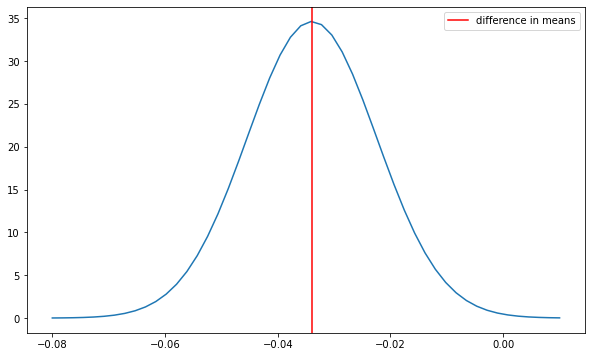

In [166]:
# build the combined error
se_c = np.sqrt(stats.loc[102]['review_score']['std']/stats.loc[102]['review_score']['count']
               + stats.loc[101]['review_score']['std']/stats.loc[101]['review_score']['count']
              )

# build the difference in means of the two
diff_mean = stats.loc[101]['review_score']['mean'] - stats.loc[102]['review_score']['mean']

# and draw the plot similar like above

fig, ax = plt.subplots(figsize=(10,6))
x_c = np.linspace(-0.08, .01)
pdf_c = scipy.stats.norm.pdf(x_c,
                            diff_mean,
                            se_c)
plt.plot(x_c, pdf_c);
# plot the difference in means
ax.axvline(diff_mean, color="r", label="difference in means")
plt.legend();

# Now the finale

* when we started Hypothesis testing:
    * $H_0$ was: mean(101) = mean(102)
* we have centered out normal distribution around mean(101) - mean(102)
* but in order to check, how likely it is, to measure a difference of the two means like the red, **given the null hypothesis is true** what do we have to do?
* shift the bell curve to 0
* COPY PASTE THE ABOVE CODE

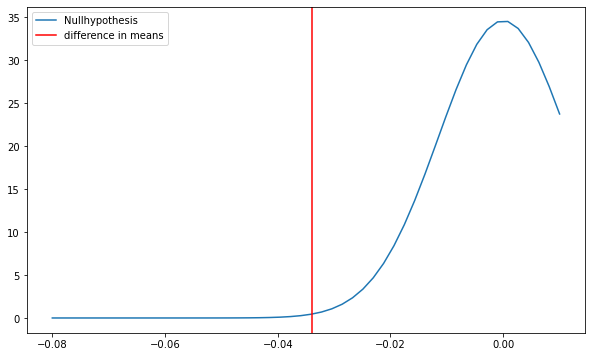

In [179]:
fig, ax = plt.subplots(figsize=(10,6))
x_c = np.linspace(-0.08, .01)
pdf_c = scipy.stats.norm.pdf(x_c,
                            0,
                            se_c)
plt.plot(x_c, pdf_c, label="Nullhypothesis");
# plot the difference in means
ax.axvline(diff_mean, color="r", label="difference in means")
plt.legend();

* What is our criterion?
* We reject H_0 if the probability that this here (red line) happened is less than 5%!
* so what is the probability to observe that here, or more extreme?
* We will calculate that with the t-statistic (how many standard errors away am I with my difference?)

In [173]:
diff_mean / se_c

-2.9444977558674617

In [ ]:
# or calculate much more comfortably
scipy.stats.ttest_ind(df_exp.loc[df_exp["experiment_id"] == 101, "review_score"],
                      df_exp.loc[df_exp["experiment_id"] == 102, "review_score"],
                      equal_var=False,
                     )

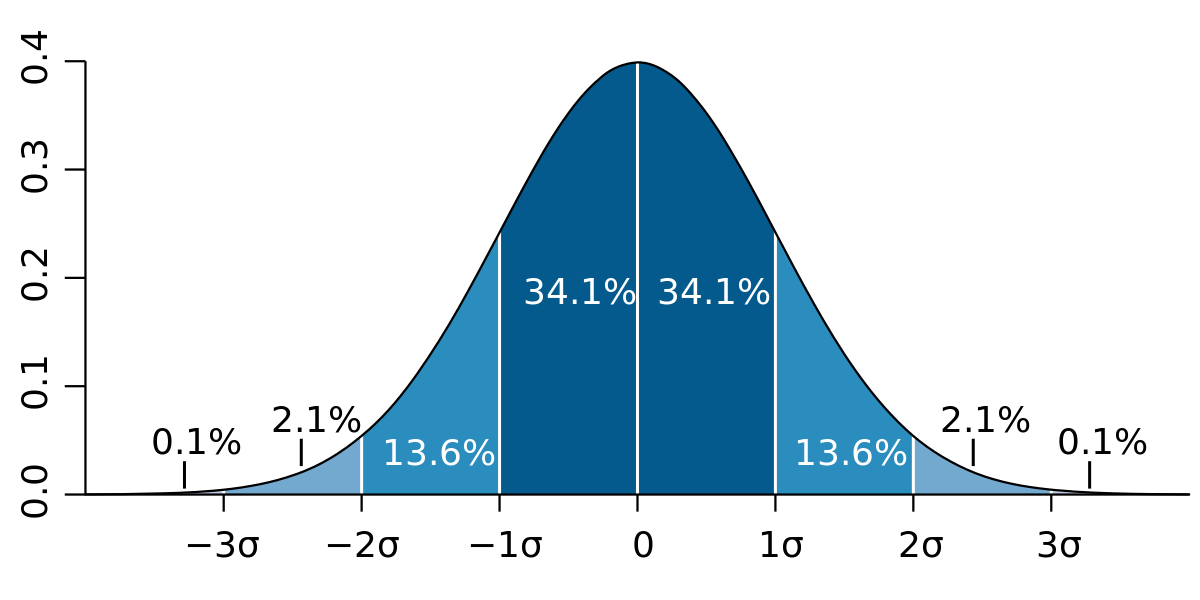

In [175]:
# compare with
Image(filename='Standard_deviation_diagram.png', width=400) 

# Result

* with our difference in means we are -3 sigma (3 standard deviations) away from the Nullhypothesis
* the likelihood that we observe a difference in the two means of -0.033 or more extreme, while assuming there is no difference (H0 is true) is less than 0.1%
* we therefore reject the Nullhypothesis
* **t-test** gives you only a probability of the two samples not being the same!
* this is the **Frequentist Approach**
* vs. **Bayesian Approach**

In [176]:
diff_mean

-0.03393889205458933

In [ ]:
#from IPython.display import Image
#Image(filename='gaussian.jpg') 